| **Inicio** | **atrás 29** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏪](./29.Distribucion_Normal.ipynb)|

# **30. De dónde vienen las Puntuaciones Z y la Distribución Normal Estándar**

## **1. Introducción**

Las puntuaciones Z y la distribución normal estándar están estrechamente relacionadas y son herramientas importantes en la estadística inferencial. Las puntuaciones Z son un tipo de transformación de datos que se utiliza para estandarizar una variable aleatoria con cualquier distribución. Por otro lado, la distribución normal estándar es una distribución normal con media cero y desviación estándar uno.

Para obtener la puntuación Z de un valor específico, primero debemos restar la media de la distribución de los datos y luego dividir por la desviación estándar. Esto nos dará una medida de cuántas desviaciones estándar se encuentra el valor de interés de la media de la distribución.

La distribución normal estándar se utiliza con frecuencia en la estadística inferencial porque permite la estandarización de diferentes distribuciones, lo que simplifica los cálculos y la interpretación de los resultados. Además, muchas pruebas estadísticas se basan en la distribución normal, lo que hace que la distribución normal estándar sea un modelo fundamental en la estadística.

Es importante destacar que cualquier variable aleatoria con cualquier distribución se puede estandarizar utilizando la fórmula de la puntuación Z, pero solo las variables aleatorias que siguen una distribución normal estándar tienen una distribución específica con propiedades bien conocidas.

## **2. Distribución Normal**

La distribución normal es una distribución de probabilidad continua que se utiliza comúnmente en estadística para describir datos que tienen una distribución simétrica alrededor de la media. Tiene una forma de campana y se caracteriza por dos parámetros: la media ($\mu$) y la desviación estándar ($\sigma$).

En Python, la distribución normal se puede generar utilizando la función ```numpy.random.normal()``` de la librería NumPy. La función toma como argumentos la media, la desviación estándar y el tamaño de la muestra. A continuación se muestra un ejemplo de cómo generar y graficar una muestra de datos con distribución normal:

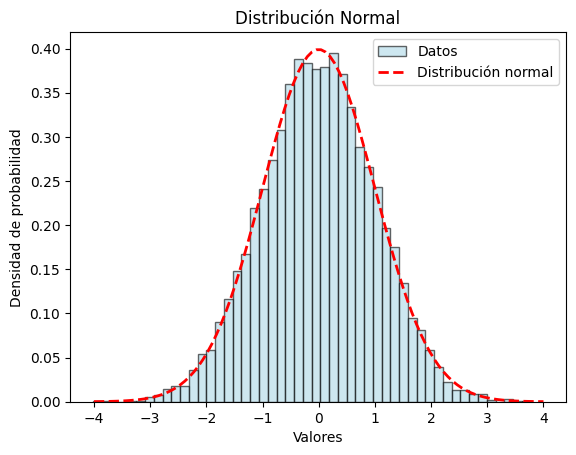

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generar una muestra de datos con distribución normal
mu = 0  # media
sigma = 1  # desviación estándar
size = 10000  # tamaño de la muestra
data = np.random.normal(mu, sigma, size)

# Crear una figura y ejes
fig, ax = plt.subplots()

# Graficar el histograma de la muestra
plt.hist(data, bins=50, density=True, alpha=0.6, color='lightblue', edgecolor='black', label='Datos')

# Graficar la curva de la distribución normal teórica
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )
plt.plot(x, y, 'r--', linewidth=2, label='Distribución normal')

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Normal')

# Agregar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

En este ejemplo, se generó una muestra de 10000 datos con una media de cero y una desviación estándar de uno. Luego se graficó el histograma de la muestra y la curva de la distribución normal teórica utilizando la fórmula matemática de la distribución normal estándar. El resultado es una gráfica que muestra la distribución normal de la muestra de datos generada

La curva roja representa la distribución normal teórica, mientras que el histograma azul representa la distribución empírica de la muestra generada. La curva teórica es simétrica alrededor de la media (cero) y tiene una desviación estándar de uno, lo que indica que la mayoría de los datos de la muestra se encuentran dentro del rango de $\pm$ desviaciones estándar alrededor de la media. Esta propiedad se puede utilizar para calcular las puntuaciones $Z$ y realizar pruebas de hipótesis estadísticas basadas en la distribución normal.

## **3. Ejemplo con 2 muestras**

Supongamos que queremos comparar la altura promedio de hombres y mujeres. Tenemos dos muestras independientes, una con 100 hombres y otra con 100 mujeres, y queremos ver si hay una diferencia significativa entre las alturas promedio de ambas muestras.

Primero, cargamos las librerías necesarias y generamos datos de altura aleatorios para cada muestra:

In [2]:
import numpy as np
import scipy.stats as stats

# Generar datos aleatorios
np.random.seed(123)  # Para reproducibilidad
altura_hombres = np.random.normal(loc=175, scale=7, size=100)
altura_mujeres = np.random.normal(loc=162, scale=6, size=100)

Luego, podemos calcular la media, la desviación estándar y el tamaño de cada muestra:

In [3]:
# Calcular estadísticas descriptivas
media_hombres = np.mean(altura_hombres)
media_mujeres = np.mean(altura_mujeres)
std_hombres = np.std(altura_hombres, ddof=1)
std_mujeres = np.std(altura_mujeres, ddof=1)
n_hombres = len(altura_hombres)
n_mujeres = len(altura_mujeres)

Podemos graficar la distribución de alturas para cada muestra usando un histograma:

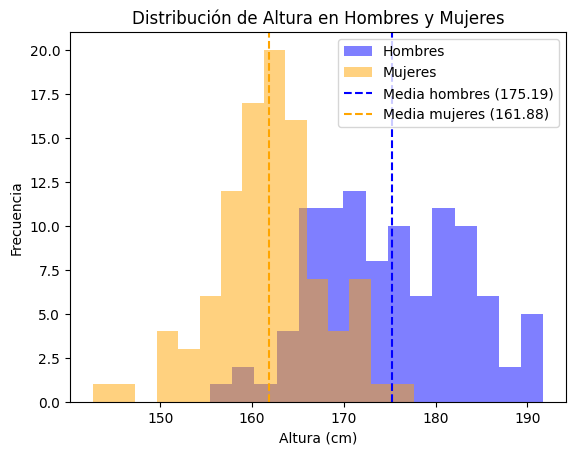

In [4]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax = plt.subplots()

# Graficar histogramas con colores personalizados
plt.hist(altura_hombres, bins=15, alpha=0.5, color='blue', label='Hombres')
plt.hist(altura_mujeres, bins=15, alpha=0.5, color='orange', label='Mujeres')

# Agregar líneas verticales para las medias
plt.axvline(x=media_hombres, color='blue', linestyle='--', label=f'Media hombres ({media_hombres:.2f})')
plt.axvline(x=media_mujeres, color='orange', linestyle='--', label=f'Media mujeres ({media_mujeres:.2f})')

# Agregar etiquetas y título
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Altura en Hombres y Mujeres')

# Agregar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

Esto debería producir una gráfica con dos histogramas superpuestos, uno para la altura de los hombres y otro para la altura de las mujeres, y dos líneas verticales punteadas que representan la altura promedio de cada muestra.

Para hacer una comparación formal de las dos muestras, podemos realizar una prueba t de dos muestras. En este caso, asumimos que las dos muestras son independientes y que tienen varianzas iguales (aunque podemos usar una corrección de Welch si no se cumple esta última suposición). Usando la función ```ttest_ind``` de la librería ```scipy.stats```, podemos calcular el valor p de la prueba t:

In [5]:
# Prueba t de dos muestras
t, p = stats.ttest_ind(altura_hombres, altura_mujeres)
print('Valor t: {:.2f}'.format(t))
print('Valor p: {:.4f}'.format(p))

Valor t: 13.50
Valor p: 0.0000


## **4. Distribución Normal Estándar**

La distribución normal estándar es una distribución normal con una media de cero y una desviación estándar de uno. Esta distribución se utiliza comúnmente en la estadística para estandarizar los datos y hacerlos comparables.

En Python, se puede generar una distribución normal estándar utilizando la librería ```numpy``` y la función ```random.normal()``` especificando una media de cero y una desviación estándar de uno:

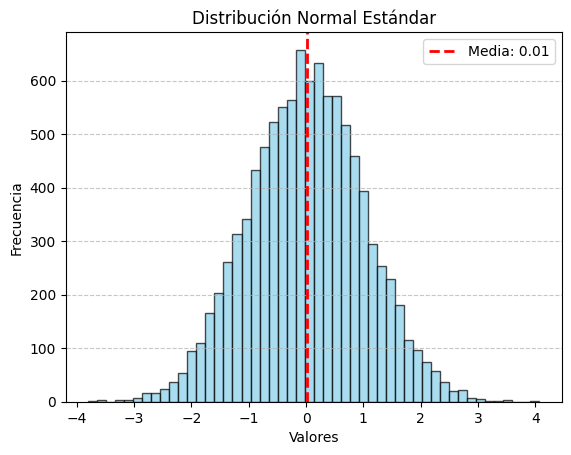

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de la distribución normal estándar
data = np.random.normal(0, 1, 10000)

# Crear un histograma de los datos generados
plt.hist(data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribución Normal Estándar")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")

# Personalizar el estilo del eje y las líneas de la cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar una línea vertical para la media
mean = np.mean(data)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean:.2f}')
plt.legend()

# Mostrar la gráfica
plt.show()

## **5. Estandarización de las muestras**

La estandarización de una muestra es un proceso mediante el cual se transforma la distribución de los datos de la muestra en una distribución normal estándar, es decir, una distribución normal con media cero y desviación estándar igual a uno. Esto se logra restando la media de la muestra a cada uno de los valores de la muestra y luego dividiendo el resultado entre la desviación estándar de la muestra.

A continuación se presenta un ejemplo con código y gráfica para ilustrar la estandarización de una muestra:

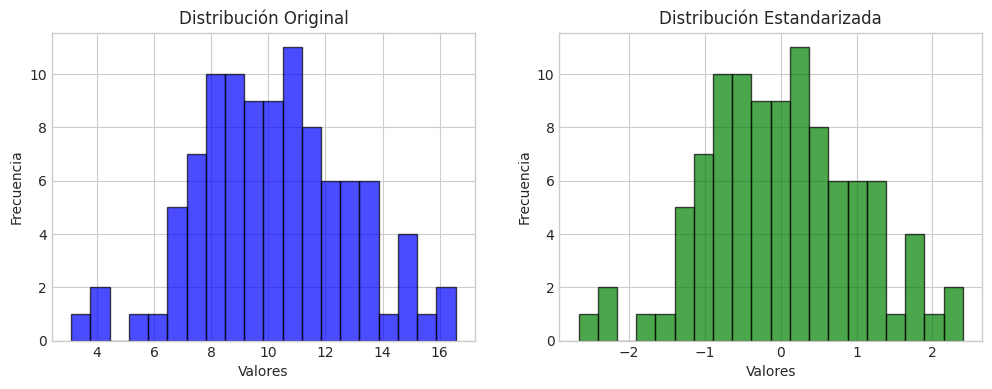

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generar una muestra de datos con media 10 y desviación estándar 3
np.random.seed(1)
muestra = np.random.normal(loc=10, scale=3, size=100)

# Calcular la media y desviación estándar de la muestra
media = np.mean(muestra)
desviacion = np.std(muestra)

# Estandarizar la muestra

estandarizada = (muestra - media) / desviacion

# Crear una figura con dos subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Personalizar los histogramas
hist_kw = dict(bins=20, alpha=0.7, edgecolor='black')

# Graficar la distribución original y la estandarizada
axs[0].hist(muestra, **hist_kw, color='blue')
axs[0].set_title('Distribución Original')
axs[0].set_xlabel('Valores')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(estandarizada, **hist_kw, color='green')
axs[1].set_title('Distribución Estandarizada')
axs[1].set_xlabel('Valores')
axs[1].set_ylabel('Frecuencia')

plt.show()

## **6. Valores o Puntuaciones Z**

Los valores o puntuaciones Z representan el número de desviaciones estándar que una observación está por encima o por debajo de la media de una distribución. Es decir, cuantifican la distancia de una observación respecto a la media en términos de la desviación estándar de la distribución. La estandarización de las muestras es útil para comparar observaciones de diferentes distribuciones, ya que permite expresarlas en una misma escala.

La fórmula para calcular el valor Z de una observación $x$ es:

​
 $Z = (x - μ) / σ$

Donde $\mu$ es la media de la distribución y $\sigma$ es la desviación estándar.

A continuación se muestra un ejemplo de cómo calcular los valores Z y graficar su distribución:

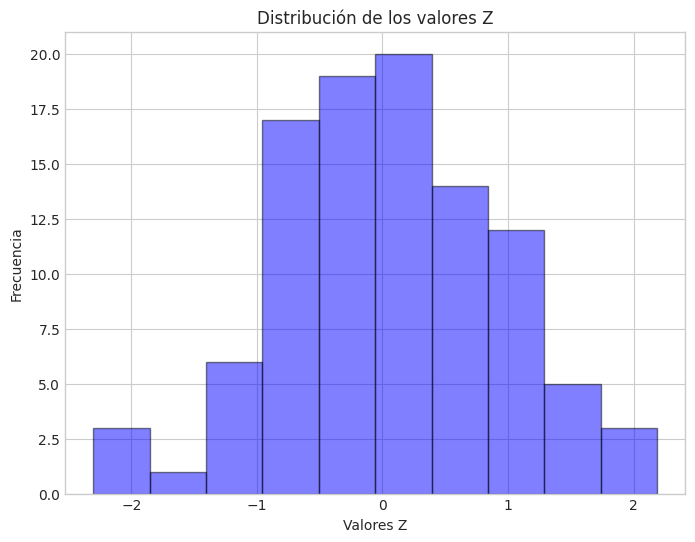

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generar una muestra aleatoria de una distribución normal
np.random.seed(1)
mu = 50
sigma = 10
sample = np.random.normal(mu, sigma, size=100)

# Calcular los valores Z de la muestra
z_scores = (sample - mu) / sigma

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Personalizar el histograma
ax.hist(z_scores, bins=10, alpha=0.5, color='blue', edgecolor='black')

# Personalizar los ejes y el título
ax.set_xlabel('Valores Z')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de los valores Z')

# Mostrar la gráfica
plt.show()

## **7. Propiedades**

Las principales propiedades de los valores o puntuaciones Z son:

* Media igual a cero: la media de los valores Z siempre será cero.
* Desviación estándar igual a uno: la desviación estándar de los valores Z siempre será uno.
* Distribución normal estándar: los valores Z se distribuyen normalmente alrededor de cero con una desviación estándar de uno.
* La transformación Z es lineal: si se aplican las mismas transformaciones lineales a la variable original y a los valores Z, los valores Z seguirán siendo los mismos. Esto permite comparar directamente valores entre diferentes distribuciones.

## **8. Distribución Normal Estándar y Probabilidad**

La distribución normal estándar es una distribución normal con media cero y desviación estándar uno. Se utiliza con frecuencia para estandarizar una variable normal y convertirla en una variable normal estándar. La probabilidad asociada con una puntuación Z determinada en la distribución normal estándar se puede obtener utilizando una tabla de valores Z o una función de distribución acumulativa.

A continuación se presenta un ejemplo de cómo calcular la probabilidad asociada con una puntuación Z utilizando la función de distribución acumulativa de la distribución normal estándar en Python:

In [9]:
import scipy.stats as st

# Calcular la probabilidad asociada con una puntuación Z de 1.5
z_score = 1.5
prob = st.norm.cdf(z_score)

print("La probabilidad asociada con una puntuación Z de 1.5 es:", prob)

La probabilidad asociada con una puntuación Z de 1.5 es: 0.9331927987311419


Esto significa que la probabilidad de obtener una puntuación Z de 1.5 o menor en la distribución normal estándar es del 93.32%.

A continuación, se muestra cómo graficar la distribución normal estándar y sombrear la probabilidad asociada con una puntuación Z específica:

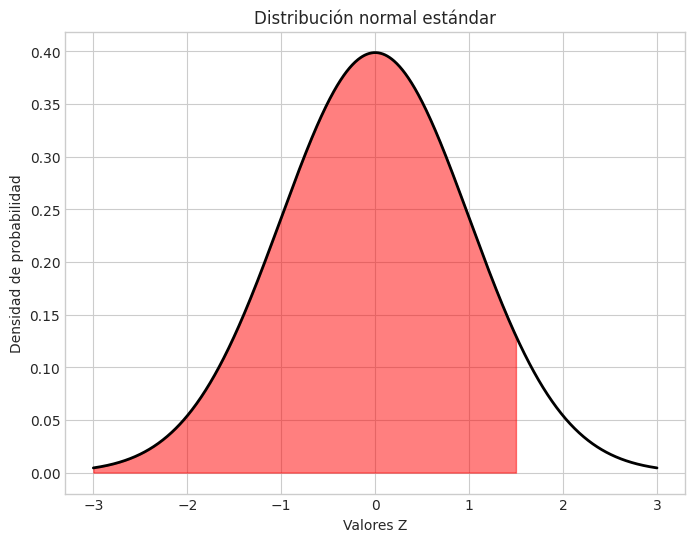

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Crear un array de valores Z desde -3 hasta 3
z_values = np.linspace(-3, 3, 1000)

# Calcular la densidad de probabilidad para los valores Z
pdf = st.norm.pdf(z_values, loc=0, scale=1)

# Calcular la probabilidad asociada con una puntuación Z de 1.5
z_score = 1.5
prob = st.norm.cdf(z_score)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar la densidad de probabilidad de la distribución normal estándar
ax.plot(z_values, pdf, color='black', linewidth=2)

# Sombrear la probabilidad asociada con una puntuación Z de 1.5
ax.fill_between(z_values[z_values <= z_score], pdf[z_values <= z_score], color='red', alpha=0.5)

# Personalizar los ejes y el título
ax.set_xlabel('Valores Z')
ax.set_ylabel('Densidad de probabilidad')
ax.set_title('Distribución normal estándar')

# Mostrar la gráfica
plt.show()

## **9. Probabilidades con Python**

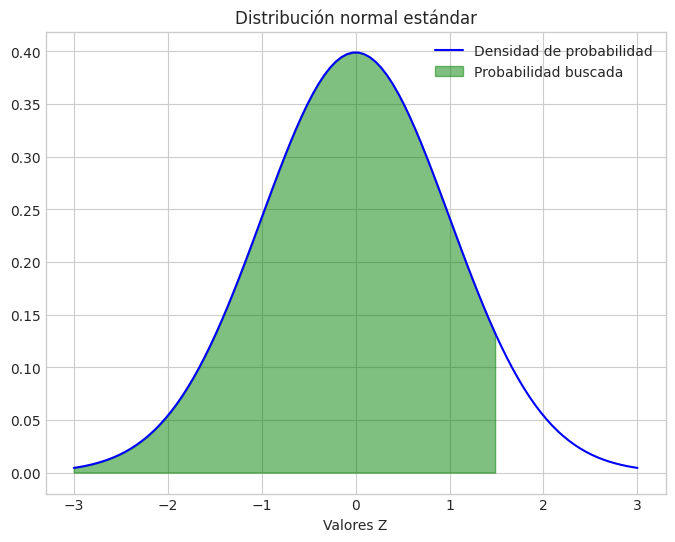

In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Definir la media y la desviación estándar de la distribución normal estándar
mu = 0
sigma = 1

# Calcular la probabilidad de que Z sea menor a 1.5
prob = norm.cdf(1.5, mu, sigma)

# Graficar la densidad de probabilidad y la región debajo de la curva
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

fig, ax = plt.subplots(figsize=(8, 6))  # Crear la figura y los ejes

# Graficar la densidad de probabilidad
ax.plot(x, norm.pdf(x, mu, sigma), label="Densidad de probabilidad", color='blue')

# Sombrear la región de la probabilidad buscada
ax.fill_between(x, norm.pdf(x, mu, sigma), where=x < 1.5, alpha=0.5, color='green', label="Probabilidad buscada")

# Personalizar el eje x y el título
ax.set_xlabel('Valores Z')
ax.set_title('Distribución normal estándar')

# Agregar una leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

| **Inicio** | **atrás 29** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏪](./29.Distribucion_Normal.ipynb)|